# Credit card  fraud detection model
### (with a sampled dataset)

## Import Packages 

In [1]:
#Ignore the warnings

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE,RandomOverSampler
from pandas_profiling import ProfileReport

## Loading the datasets 

In [3]:
df = pd.read_csv('sampled_creditcard.csv')

In [4]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,263525,160995.0,2.066176,-0.063280,-1.093747,0.403619,-0.127592,-1.182286,0.173421,-0.322570,...,-0.294934,-0.722859,0.334253,-0.028370,-0.295336,0.200237,-0.071834,-0.060852,1.98,0
1,191544,129308.0,0.054682,1.856500,-4.075451,4.100098,-0.800931,-0.292502,-2.317431,1.189747,...,0.618248,0.800932,0.130016,0.288946,-0.366658,0.030307,0.431182,0.110698,80.90,1
2,156990,109298.0,-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,...,0.439757,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,186.13,1
3,43721,41629.0,-2.269236,-0.734795,2.109472,-0.452875,-1.151500,0.697121,-0.549779,-0.081487,...,-0.117670,0.524862,-0.850484,0.216792,-0.186753,-0.122629,-0.277072,-0.041604,214.59,0
4,100793,67625.0,-0.831546,-0.135969,3.192675,-1.334059,-1.352432,0.468593,-0.754107,0.465917,...,0.190161,0.978781,-0.344628,0.476262,0.442141,-0.104082,0.365885,0.130057,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,177393,123158.0,1.928094,-0.728856,-2.599526,-0.473969,2.225313,3.687825,-0.601118,0.851008,...,0.307130,1.153426,-0.164956,0.782562,0.632914,-0.185777,0.040212,-0.058668,47.21,0
2488,144108,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,...,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1
2489,56692,47540.0,1.305176,-1.294216,0.118347,-1.094185,-1.469358,-0.760881,-0.698364,-0.171184,...,-0.120295,-0.019424,-0.077900,0.390805,0.503174,-0.060136,0.012328,0.021599,96.00,0
2490,203870,135010.0,0.737180,-2.984544,-3.473901,-0.300695,-0.358769,-1.202648,1.566343,-0.867259,...,0.968472,1.021272,-0.923782,0.891839,0.508963,0.178266,-0.250897,0.056569,826.60,0


In [5]:
df.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

## Data Preprocessing and EDA

In [6]:
# dropping the unnamed column as it is not needed.......
df.drop('Unnamed: 0', axis="columns", inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,160995.0,2.066176,-0.063280,-1.093747,0.403619,-0.127592,-1.182286,0.173421,-0.322570,0.568539,...,-0.294934,-0.722859,0.334253,-0.028370,-0.295336,0.200237,-0.071834,-0.060852,1.98,0
1,129308.0,0.054682,1.856500,-4.075451,4.100098,-0.800931,-0.292502,-2.317431,1.189747,-0.786238,...,0.618248,0.800932,0.130016,0.288946,-0.366658,0.030307,0.431182,0.110698,80.90,1
2,109298.0,-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,-2.766438,...,0.439757,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,186.13,1
3,41629.0,-2.269236,-0.734795,2.109472,-0.452875,-1.151500,0.697121,-0.549779,-0.081487,0.020627,...,-0.117670,0.524862,-0.850484,0.216792,-0.186753,-0.122629,-0.277072,-0.041604,214.59,0
4,67625.0,-0.831546,-0.135969,3.192675,-1.334059,-1.352432,0.468593,-0.754107,0.465917,0.087677,...,0.190161,0.978781,-0.344628,0.476262,0.442141,-0.104082,0.365885,0.130057,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,123158.0,1.928094,-0.728856,-2.599526,-0.473969,2.225313,3.687825,-0.601118,0.851008,1.291207,...,0.307130,1.153426,-0.164956,0.782562,0.632914,-0.185777,0.040212,-0.058668,47.21,0
2488,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,...,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1
2489,47540.0,1.305176,-1.294216,0.118347,-1.094185,-1.469358,-0.760881,-0.698364,-0.171184,-1.723817,...,-0.120295,-0.019424,-0.077900,0.390805,0.503174,-0.060136,0.012328,0.021599,96.00,0
2490,135010.0,0.737180,-2.984544,-3.473901,-0.300695,-0.358769,-1.202648,1.566343,-0.867259,-1.240369,...,0.968472,1.021272,-0.923782,0.891839,0.508963,0.178266,-0.250897,0.056569,826.60,0


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
%matplotlib inline

# Set the default figure size for all plots in the notebook
plt.rcParams['figure.figsize'] = (8, 6)

In [9]:
# getting the number of the fraudlent transaction and Valid transaction.....
fraud = df[df['Class']==1]
normal = df[df['Class'] == 0]
fraction = len(fraud)/float(len(normal))

print ('Fraudlent Transactions: {}'.format(len(fraud)))
print ('Non-Fraudlent Transactions: {}'.format(len(normal)))
print ('Fraction of the variable: {}'.format(fraction))

Fraudlent Transactions: 492
Non-Fraudlent Transactions: 2000
Fraction of the variable: 0.246


<Axes: xlabel='Class', ylabel='count'>

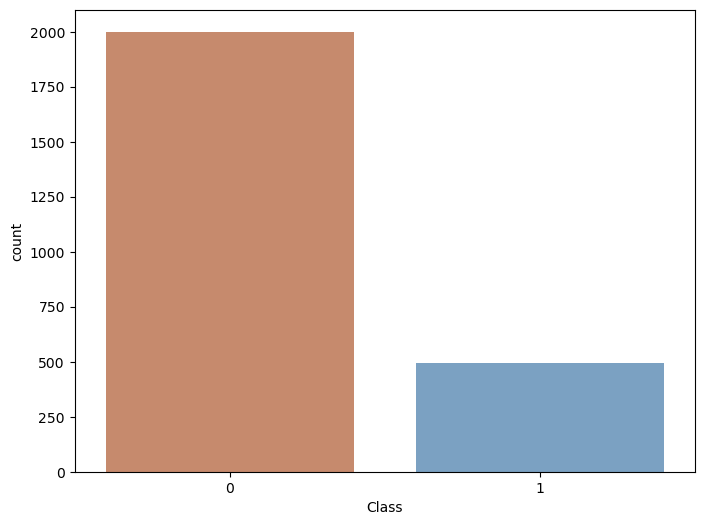

In [10]:
# Visualizing the data....
sns.countplot(x = "Class", data=df, saturation=1.5, palette='twilight_shifted_r')

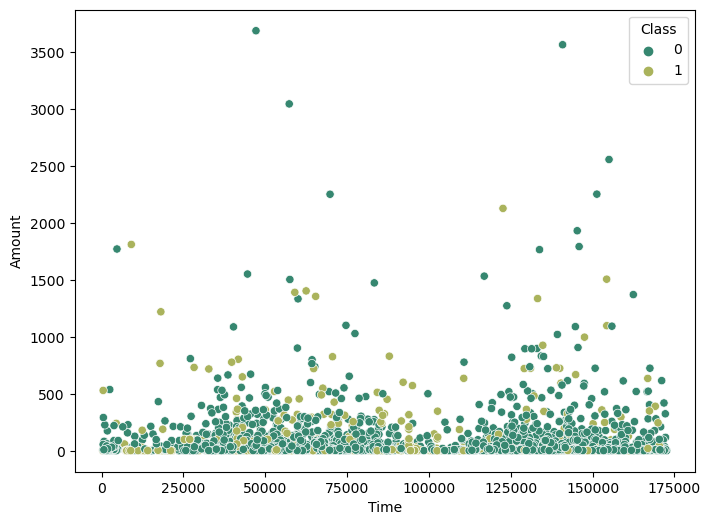

In [11]:
sns.scatterplot(x='Time', y='Amount', data=df, hue="Class", palette='gist_earth')
plt.show()

In [12]:
max_amount = df[["Amount"]]
max_amount.describe()

,Amount
count,2492.000000
mean,99.756112
std,241.159542
min,0.000000
25%,3.760000
50%,22.520000
75%,93.372500
max,3684.620000


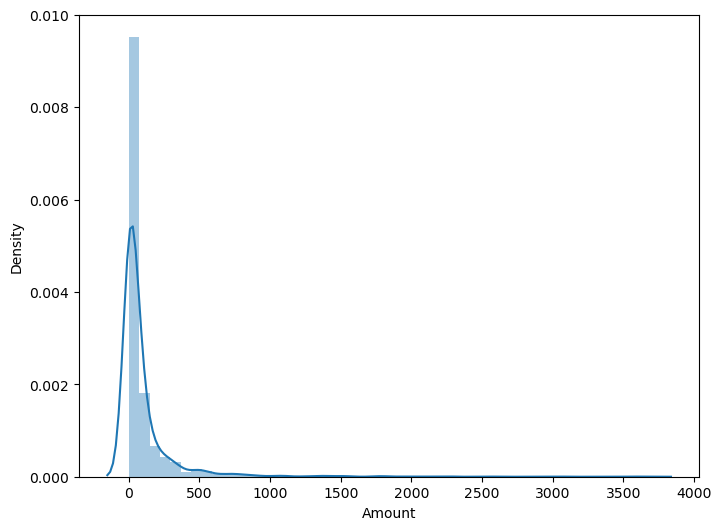

In [13]:
sns.distplot(df["Amount"])
plt.show()

In [14]:
max_time = df[['Time']]
max_time.describe()

,Time
count,2492.000000
mean,92639.335875
std,47843.030942
min,406.000000
25%,52577.000000
50%,84439.000000
75%,138787.500000
max,172587.000000


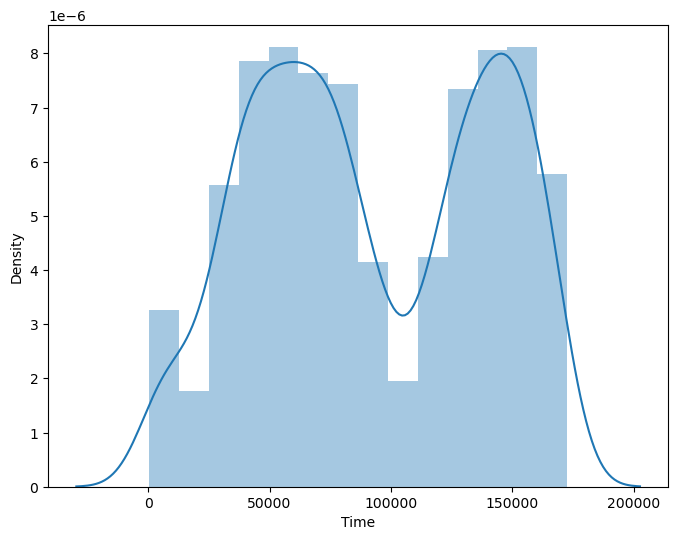

In [15]:
plt.figure(figsize=[8,6])
sns.distplot(df["Time"])
plt.show()

<Figure size 600x400 with 0 Axes>

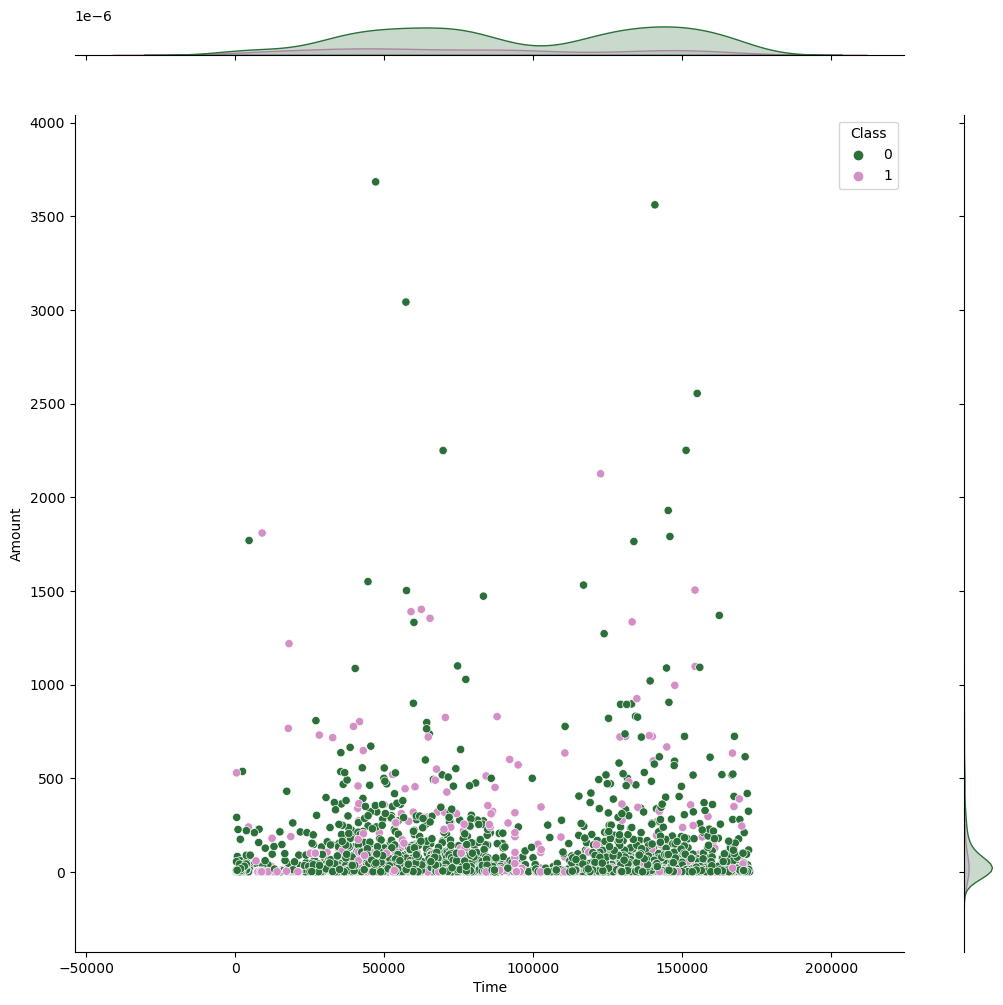

In [16]:
plt.figure(figsize=[6,4])
sns.jointplot(x='Time', y='Amount', data=df, hue="Class", height=10, ratio=10, space=2, palette= 'cubehelix')
plt.show()

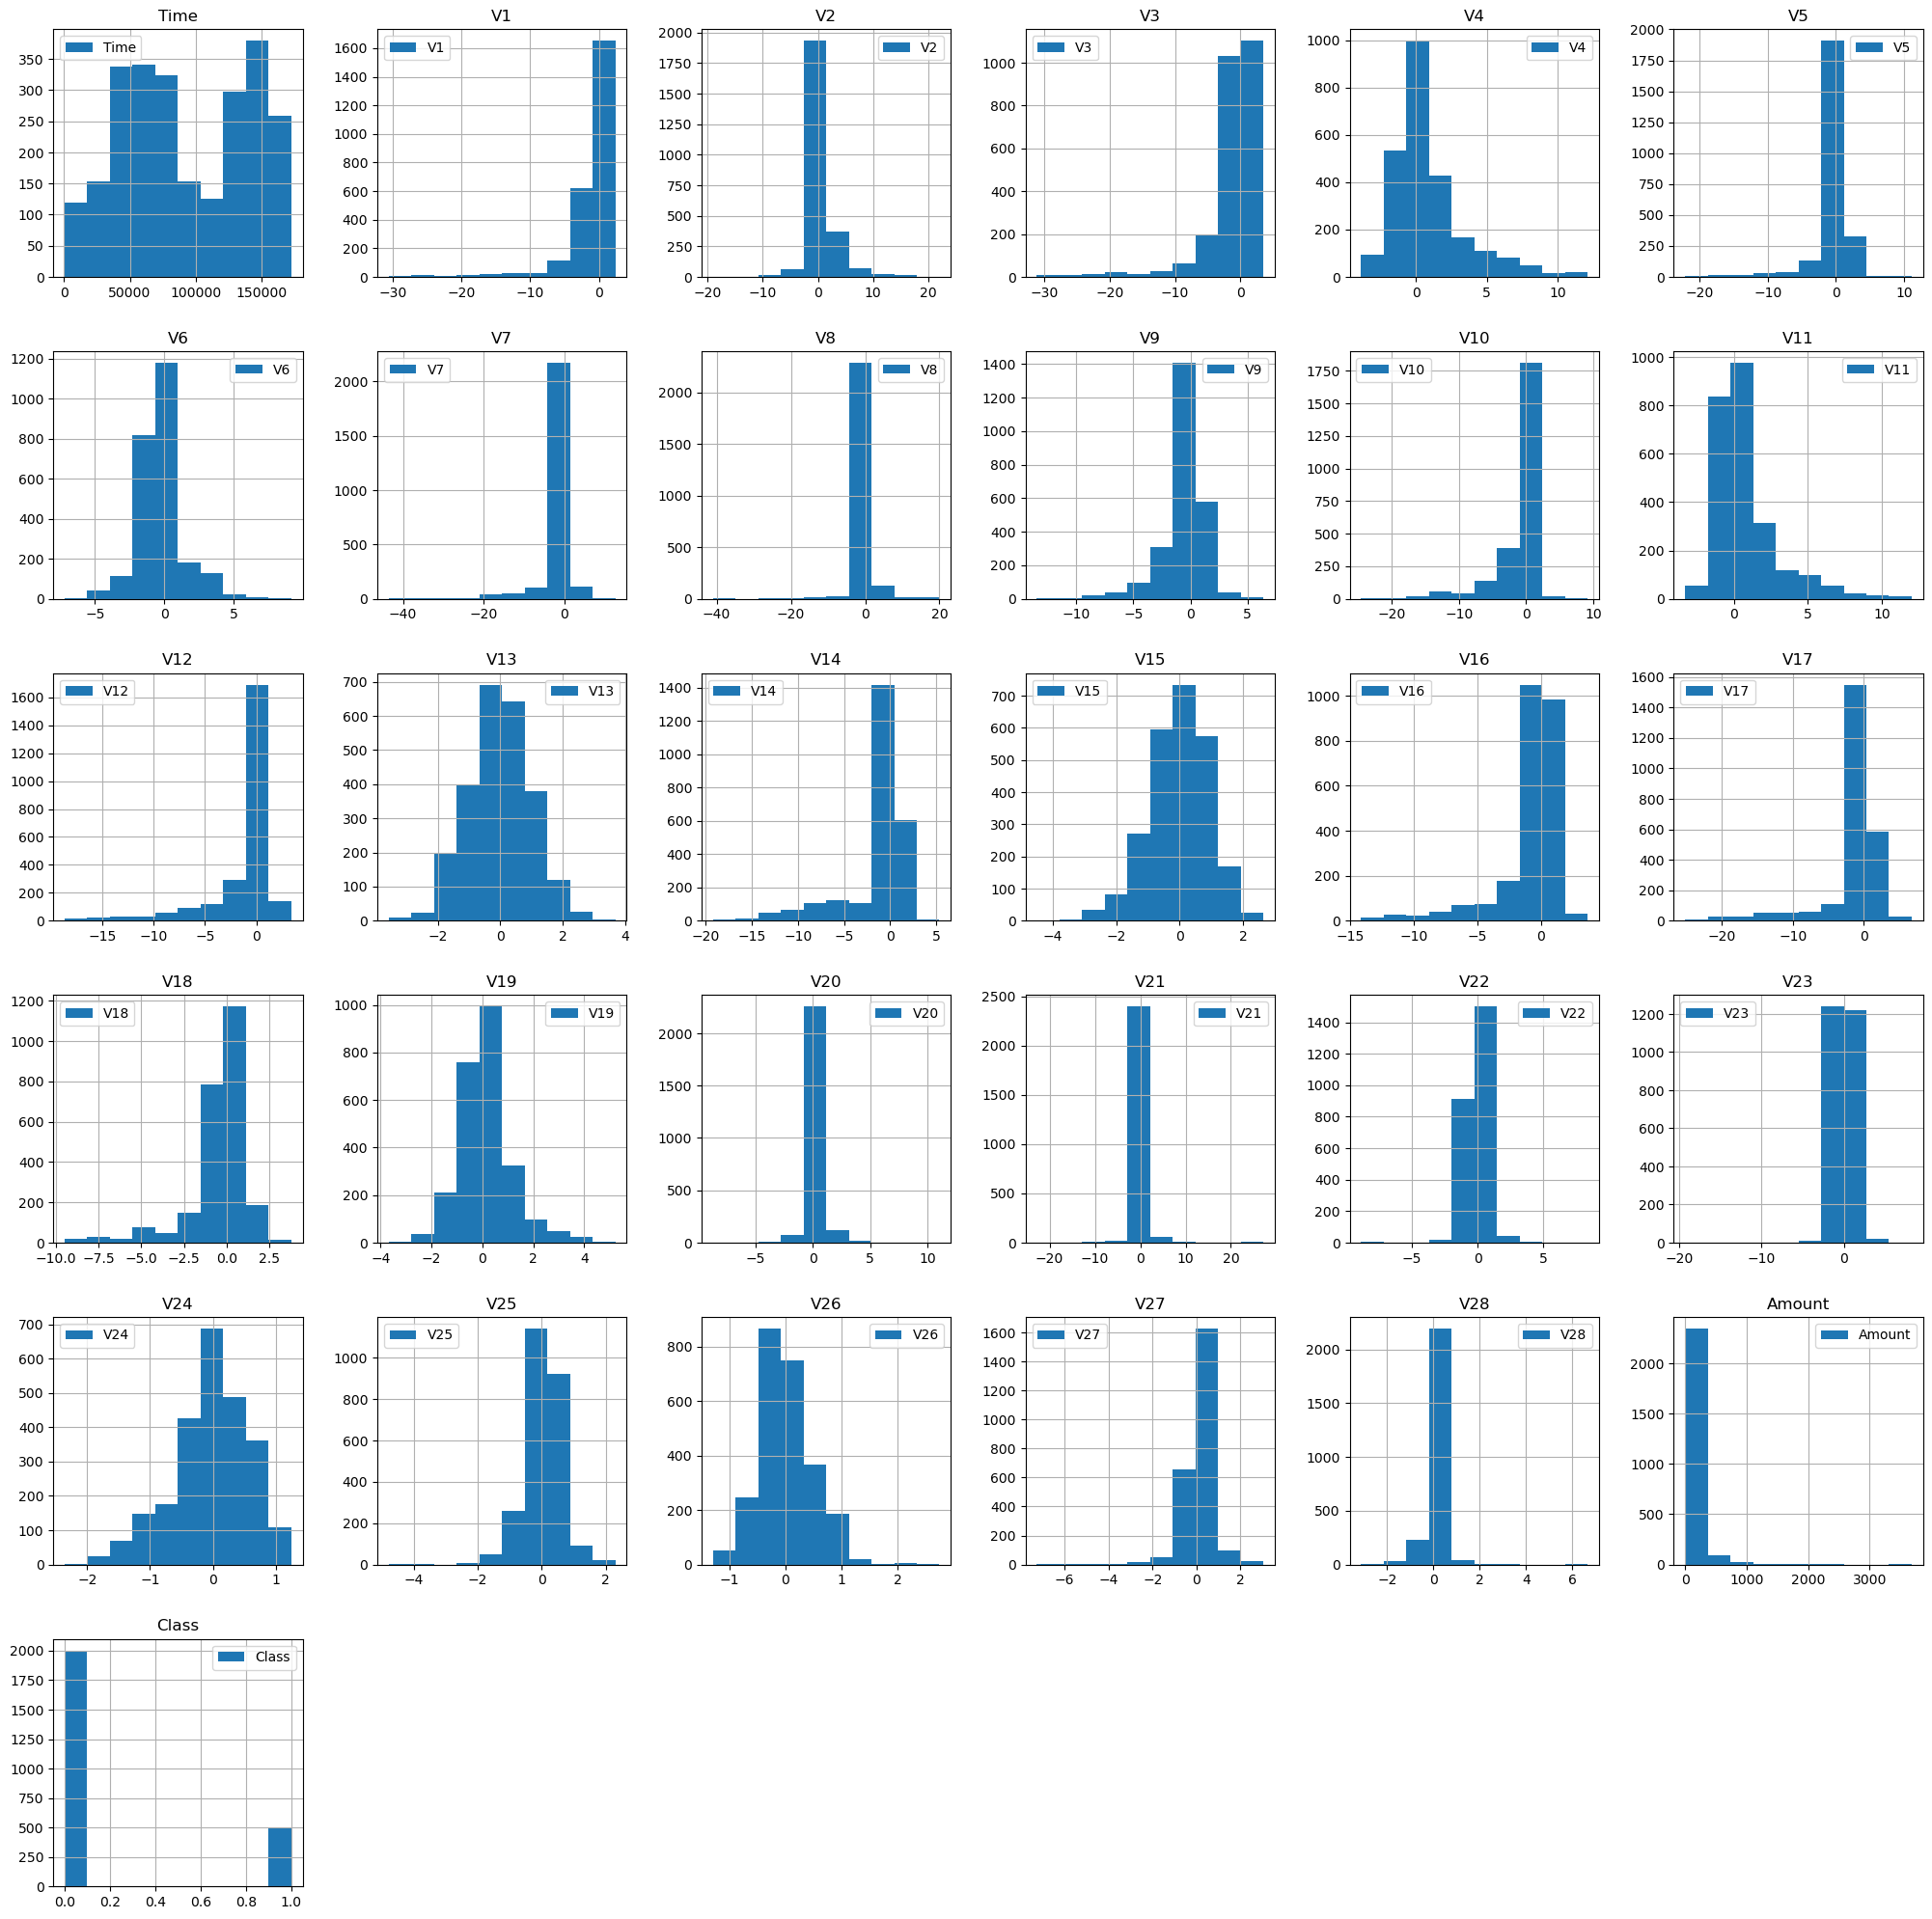

In [17]:
df.hist(figsize=(25, 25), legend=True)
plt.show()

# Balancing the Dataset

In [18]:
X = df.iloc[:, :-1]
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [19]:
Y = df.iloc[:, -1]
X.shape, Y.shape

((2492, 30), (2492,))

In [20]:
oversample = RandomOverSampler(random_state=101)
oversample

RandomOverSampler(random_state=101)

In [21]:
print("Type of X:", type(X))
print("Type of Y:", type(Y))

Type of X: <class 'pandas.core.frame.DataFrame'>
Type of Y: <class 'pandas.core.series.Series'>


In [22]:
x_res, y_res = oversample.fit_resample(X, Y)

In [23]:
print ('####### NEW SHAPE #######')
print ('{}'.format(x_res.shape))
print ('{}'.format(y_res.shape))

####### NEW SHAPE #######
(4000, 30)
(4000,)


In [24]:
names = df.columns.to_list()
names

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [25]:
new_df = pd.concat([x_res, y_res], axis=1)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,160995.0,2.066176,-0.063280,-1.093747,0.403619,-0.127592,-1.182286,0.173421,-0.322570,0.568539,...,-0.294934,-0.722859,0.334253,-0.028370,-0.295336,0.200237,-0.071834,-0.060852,1.98,0
1,129308.0,0.054682,1.856500,-4.075451,4.100098,-0.800931,-0.292502,-2.317431,1.189747,-0.786238,...,0.618248,0.800932,0.130016,0.288946,-0.366658,0.030307,0.431182,0.110698,80.90,1
2,109298.0,-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,-2.766438,...,0.439757,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,186.13,1
3,41629.0,-2.269236,-0.734795,2.109472,-0.452875,-1.151500,0.697121,-0.549779,-0.081487,0.020627,...,-0.117670,0.524862,-0.850484,0.216792,-0.186753,-0.122629,-0.277072,-0.041604,214.59,0
4,67625.0,-0.831546,-0.135969,3.192675,-1.334059,-1.352432,0.468593,-0.754107,0.465917,0.087677,...,0.190161,0.978781,-0.344628,0.476262,0.442141,-0.104082,0.365885,0.130057,2.00,0


In [26]:
from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [27]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1248,66330.0,-2.473592,-0.742805,0.250404,-2.408351,1.134558,3.894621,-1.345541,1.559297,0.040289,...,0.104963,0.780682,-0.315167,1.095390,1.054962,0.047450,0.430392,0.173692,80.00,0
207,44606.0,-0.704176,0.761602,1.807640,-0.071644,-1.853967,-0.112179,1.469662,-0.655873,0.128971,...,0.004192,0.380741,0.052013,1.024476,-1.025730,0.781699,-0.398850,-0.139280,245.97,0
43,170763.0,-0.455349,1.054809,0.197372,0.145380,1.148362,-0.737848,1.947003,-0.467745,-0.804088,...,0.223826,0.811799,-0.484527,0.006395,0.515986,-0.449242,-0.192643,-0.124627,46.00,0
2383,101650.0,0.061107,1.532285,-1.337551,-0.084673,0.599611,0.530159,-1.814087,-5.457424,0.773931,...,-3.063126,-0.489178,0.395748,0.095285,0.446480,0.161111,-0.123355,0.154120,1.98,0
2534,100223.0,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,...,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,2.28,1


In [28]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2811,41313.0,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,...,3.058082,0.941180,-0.232710,0.763508,0.075456,-0.453840,-1.508968,-0.686836,9.99,1
3695,41285.0,-12.835760,6.574615,-12.788462,8.786257,-10.723121,-2.813536,-14.248847,7.960521,-7.718751,...,2.679490,-0.047335,-0.836982,0.625349,0.125865,0.177624,-0.817680,-0.521030,37.32,1
3101,34521.0,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52,1
3275,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
1750,47293.0,-0.286069,1.042529,0.925886,-0.122894,0.349823,-0.529214,0.644231,0.026482,-0.208832,...,-0.327461,-0.912591,-0.104347,-0.543145,-0.077226,0.127298,0.238387,0.087964,5.16,0


In [29]:
new_df.shape

(4000, 31)

In [30]:
# getting the number of the fraudlent transaction and Valid transaction.....after balancing the data
fraud = new_df[new_df['Class']==1]
normal = new_df[new_df['Class'] == 0]
fraction = len(fraud)/float(len(normal))

print ('Fraudlent Transactions: {}'.format(len(fraud)))
print ('Non-Fraudlent Transactions: {}'.format(len(normal)))
print ('Fraction of the variable: {}'.format(fraction))

Fraudlent Transactions: 2000
Non-Fraudlent Transactions: 2000
Fraction of the variable: 1.0


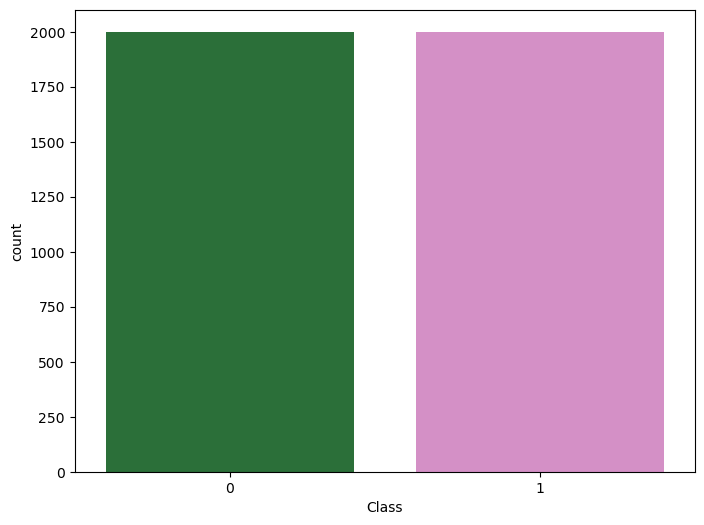

In [31]:
# Visualizing the data....after balncing the data
sns.countplot(x = "Class", data=new_df, saturation=1.5, palette='cubehelix')
plt.show()

<Figure size 1200x1000 with 0 Axes>

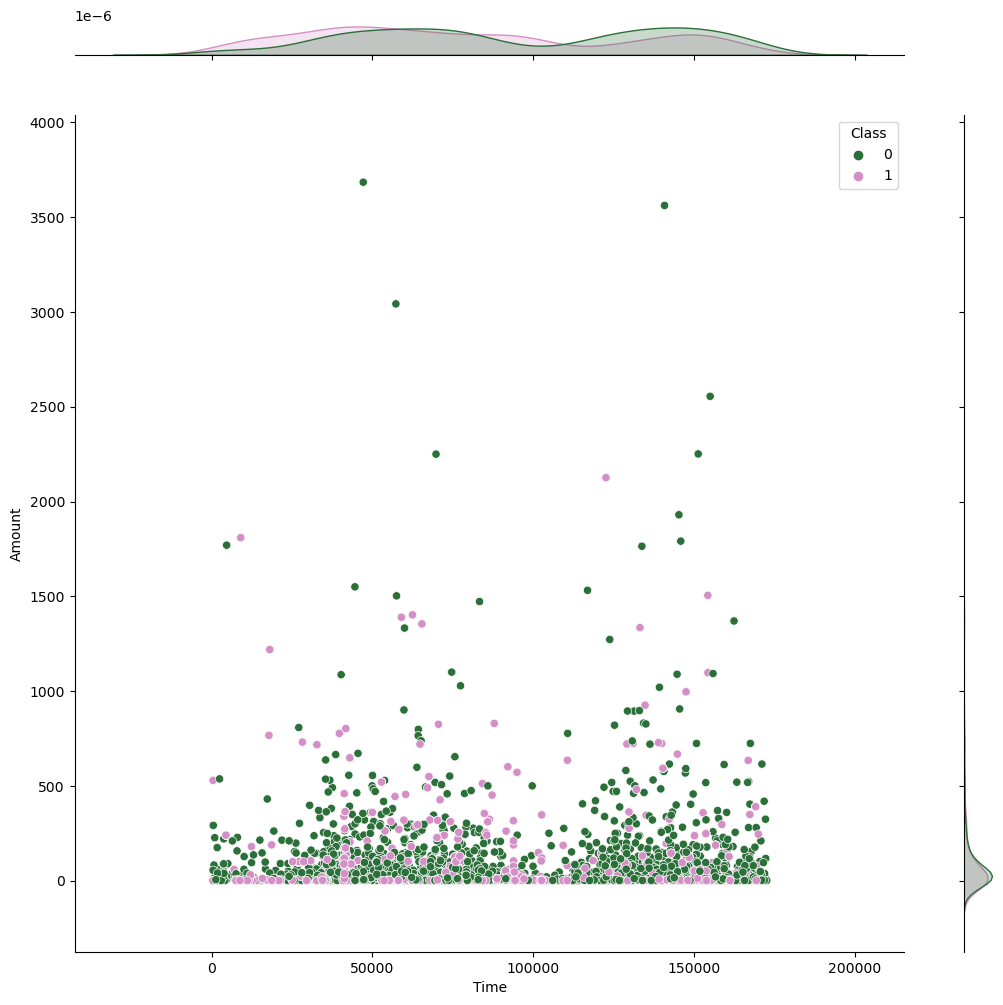

In [32]:
plt.figure(figsize=[12,10])
sns.jointplot(x='Time', y='Amount', data=new_df, hue="Class", height=10, ratio=10, space=2, palette= 'cubehelix')
plt.show()

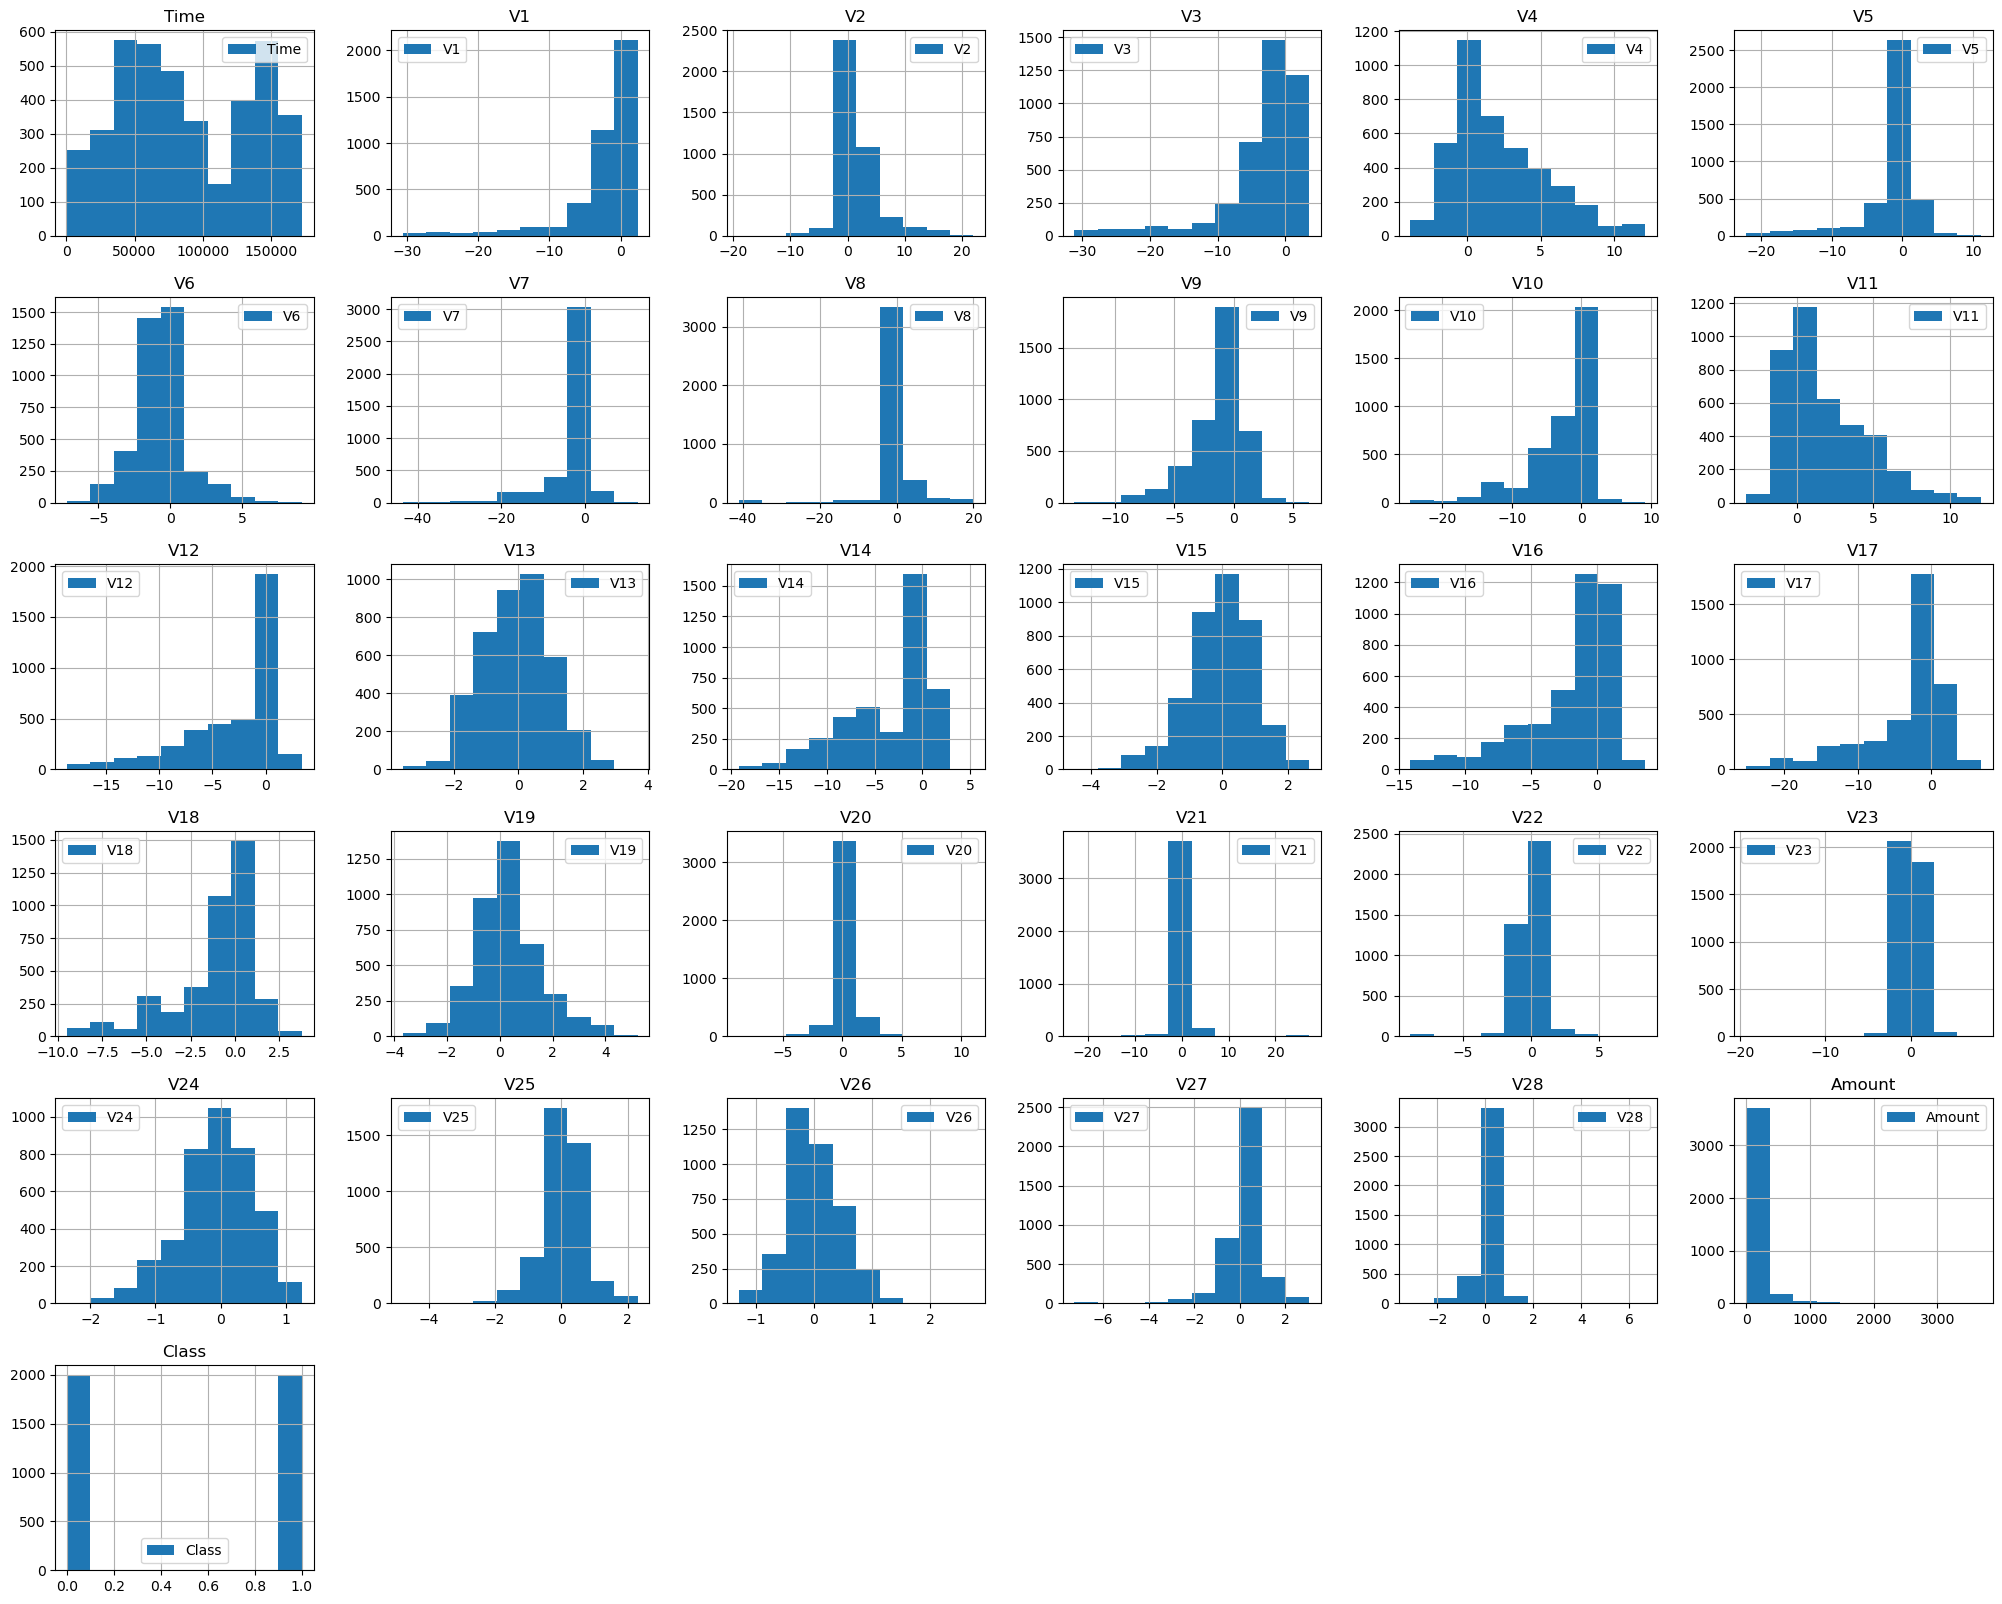

In [33]:
new_df.hist(figsize=(25,20), legend=True)
plt.show()

In [34]:
new_df.to_csv('BalancedCreditCardDataset.csv')

In [35]:
new_df.shape

(4000, 31)

# Model Building

In [36]:
names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
         'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [37]:
# separating the feature from the target variable.......by slicing the dataset
x = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]
X = np.array([new_df.iloc[4, :-1]])
X = X.astype(float)
print (X.shape)

(1, 30)


In [38]:
data = pd.DataFrame(X, columns=names)
data.shape

(1, 30)

In [39]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,100223.0,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,...,3.834649,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,2.28


# Importing the Model Algorithms, train_test split and Model Validation

In [40]:
# train test split
from sklearn.model_selection import train_test_split
# accuracy score, f1 score, classification report and confusion matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error

In [41]:
# spliting into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=101)
X_train.shape, X_test.shape

((2800, 30), (1200, 30))

In [42]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc

RandomForestClassifier(random_state=42)

In [44]:
# Training and predicting the data using K Nearest Neighbor
rfc.fit(X_train, y_train)
ypred_rfc = rfc.predict(new_df)
ypred_rfc

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Class


In [ ]:
print('\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_rfc)))

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, ypred_knn)
label = [ 'Valid', 'Fraud']
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='YlGn')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for K Nearest Neighbor', fontsize=17)
plt.show()

### HyperParameter tuning for KNN

In [ ]:
from sklearn.model_selection import GridSearchCV # using the GridSearchCV

knn_param = KNeighborsClassifier()
knn_params = {"n_neighbors": list(range(2, 10, 1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn_param, param_grid=knn_params)
grid_knn.fit(X_train, y_train)
print  ('Best Parameters: {}'.format(grid_knn.best_params_))
print('Best Accuracy Score: {:.2f}% accuracy score'.format(grid_knn.best_score_ * 100))
print('Best Estimator: {} \nBest Index: {}'.format(grid_knn.best_estimator_, grid_knn.best_index_))

## Decision Tree

In [47]:
# importing decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Hyperparameter Tuning for Decision Tree

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'splitter': 'best'}
Best Accuracy Score: 94.86% accuracy score
Best Estimator: DecisionTreeClassifier(max_depth=5, min_samples_leaf=7) 
Best Index: 34

	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       598
           1       0.98      0.89      0.93       602

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



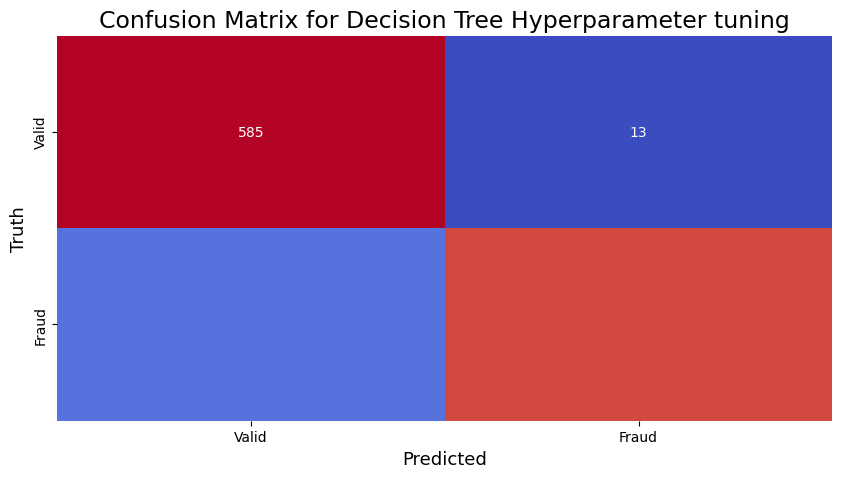

In [62]:
# Hyperparameter tuning using GridSearchCV
dtree_param = DecisionTreeClassifier()
tree_parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],
                   'max_depth': list(range(2, 6, 1)), 'min_samples_leaf': list(range(5, 10, 1)),
                   'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4]}
grid_tree = GridSearchCV(dtree_param, tree_parameters)
grid_tree.fit(X_train, y_train)
ypred_gtree = grid_tree.predict(X_test)

print('Best Parameters: {}'.format(grid_tree.best_params_))
print('Best Accuracy Score: {:.2f}% accuracy score'.format(grid_tree.best_score_ * 100))
print('Best Estimator: {} \nBest Index: {}'.format(grid_tree.best_estimator_, grid_tree.best_index_))
print('\n\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_gtree)))

# Confusion matrix
cm = confusion_matrix(y_test, ypred_gtree)
label = ['Valid', 'Fraud']
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for Decision Tree Hyperparameter tuning', fontsize=17)
plt.show()

In [63]:
dtree_2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dtree_2

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [93]:
dtree_2.fit(X_train, y_train)
ypred_dtree_2 = dtree_2.predict(x_res)
ypred_dtree_2

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
print("Shape of y.values:", y.values.shape)
print("Shape of ypred_dtree_2:", ypred_dtree_2.shape)

Shape of y.values: (4000,)
Shape of ypred_dtree_2: (4000,)


In [95]:
X.shape, Y.shape, x.shape, y.shape, X_train.shape, y_train.shape, x_res.shape, y_res.shape

((1, 30),
 (2492,),
 (4000, 30),
 (4000,),
 (2800, 30),
 (2800,),
 (4000, 30),
 (4000,))

In [96]:
error = mean_absolute_error(y.values, ypred_dtree_2)
print ("The error is: {}".format(error))

The error is: 0.50625


In [97]:
# using the decision tree model
dtree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [98]:
dtree.fit(X_train, y_train)
ypred_dtree = dtree.predict(X_test)
ypred_dtree

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

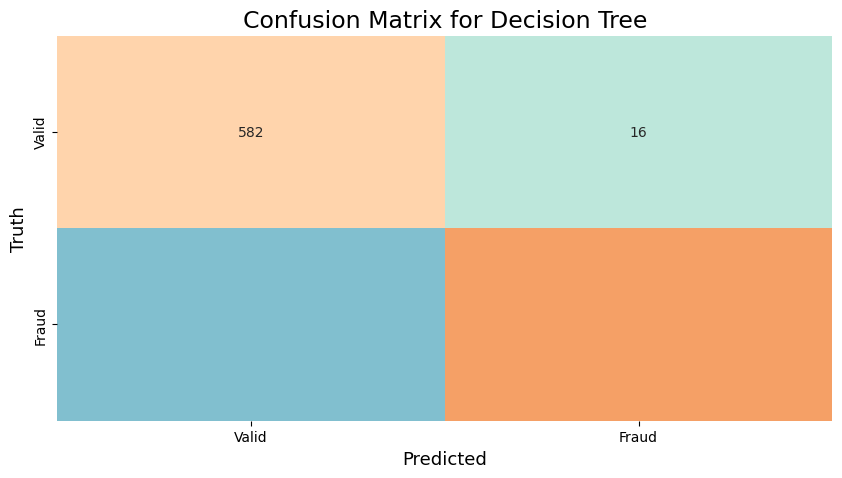

In [99]:
# confusion Matrix
cm = confusion_matrix(y_test, ypred_dtree)
label = ['Valid', 'Fraud']
plt.figure(figsize=[10,5])
sns.heatmap(cm,  annot=True, cbar=False, fmt='d', cmap='icefire')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for Decision Tree', fontsize=17)
plt.show()

In [100]:
print('\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_dtree)))

	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       598
           1       0.97      0.90      0.93       602

    accuracy                           0.93      1200
   macro avg       0.94      0.93      0.93      1200
weighted avg       0.94      0.93      0.93      1200



## Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rf = RandomForestClassifier(n_estimators= 150, min_samples_split=5, min_samples_leaf=5)
rf

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5,
                       n_estimators=150)

In [90]:
rf.fit(X_train, y_train)
ypred_rf =rf.predict(X_test)
ypred_rf

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)


	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       598
           1       1.00      0.96      0.98       602

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



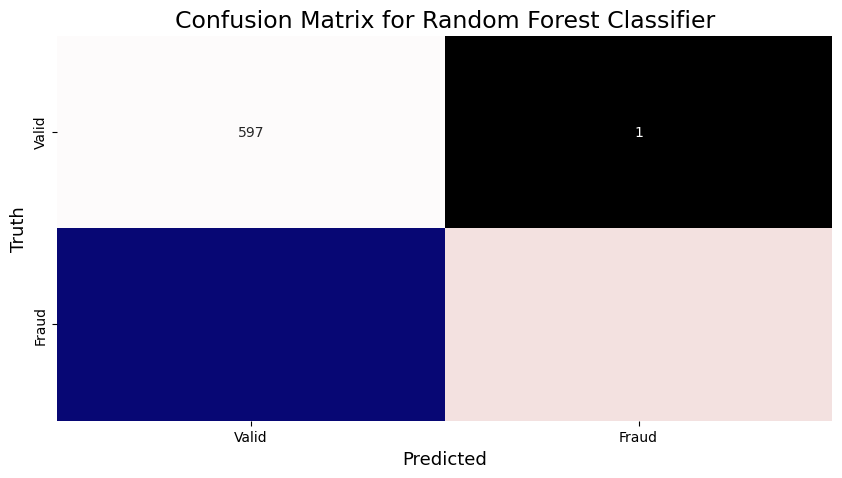

In [103]:
print('\n\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_rf)))

# confusion matrix
cm = confusion_matrix(y_test, ypred_rf)
label = [ 'Valid', 'Fraud']
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='gist_earth')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for Random Forest Classifier', fontsize=17)
plt.show()

## Support vector Machine

In [104]:
from sklearn.svm import SVC

### HyperparameterTuning for Support Vector Machine

[0 1 0 ... 1 0 0]
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy Score: 95.57% accuracy score
Best Estimator: SVC(C=1, gamma=0.1) 
Best Index: 0

	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       598
           1       1.00      0.95      0.97       602

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



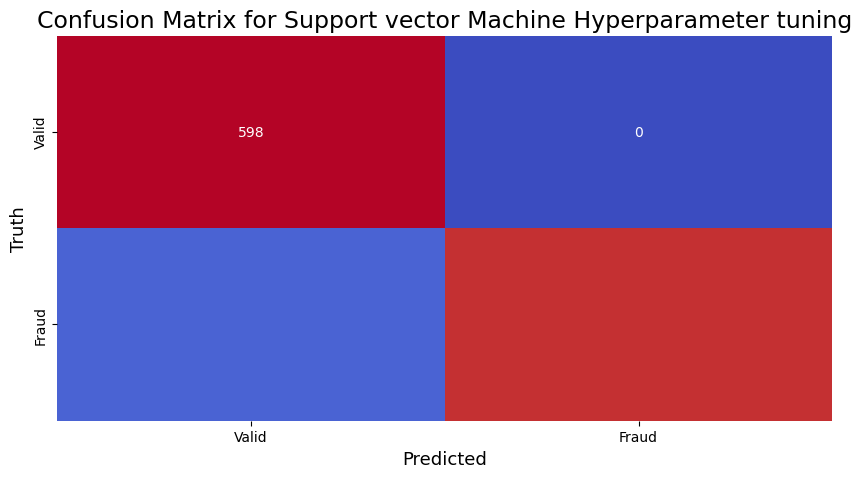

In [105]:
svc_param = SVC()
parameters = {
    "kernel" : ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.1, 1, 0.01, 0.0001, 0.001]
}

grid_svc = GridSearchCV(svc_param, parameters)
grid_svc.fit(X_train, y_train)
ypred_gsvc = grid_svc.predict(X_test)
print (ypred_gsvc)

print  ('Best Parameters: {}'.format(grid_svc.best_params_))
print('Best Accuracy Score: {:.2f}% accuracy score'.format(grid_svc.best_score_ * 100))
print('Best Estimator: {} \nBest Index: {}'.format(grid_svc.best_estimator_, grid_svc.best_index_))
print('\n\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_gsvc)))

# confusion matrix
cm = confusion_matrix(y_test, ypred_gsvc)
label = [ 'Valid', 'Fraud']
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for Support vector Machine Hyperparameter tuning', fontsize=17)
plt.show()

## Extreme Gradient Boosting (XGBoost)

In [106]:
from xgboost import XGBClassifier

In [107]:
xgb = x=XGBClassifier(objective='binary:logistic', use_label_encoder=True, n_estimators=100, n_jobs=5)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=5,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
xgb.fit(X_train, y_train)
ypred_xgb = xgb.predict(X_test)
ypred_xgb

array([0, 1, 0, ..., 1, 0, 0])


	##########CLASSIFICATION REPORT########## 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       598
           1       0.99      1.00      0.99       602

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



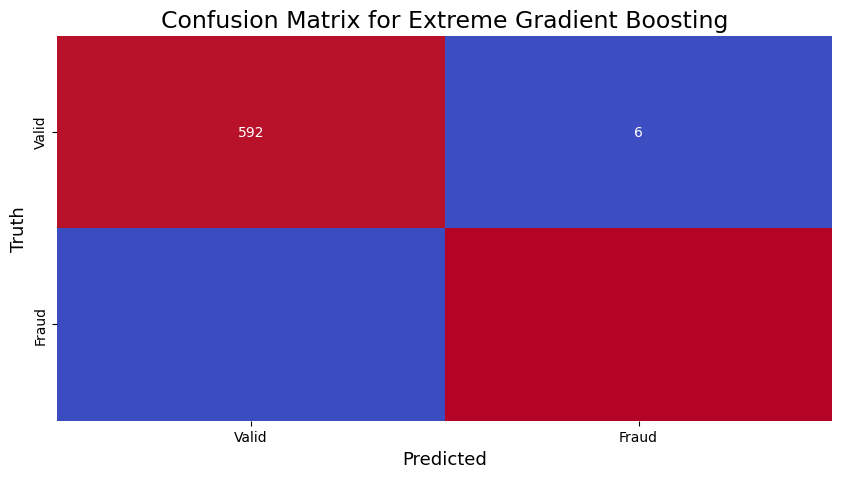

In [109]:
# Classification Report
print('\n\t##########CLASSIFICATION REPORT########## \n{}'.format(classification_report(y_test, ypred_xgb)))

# confusion matrix
cm = confusion_matrix(y_test, ypred_xgb)
label = [ 'Valid', 'Fraud']
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Truth', fontsize=13)
plt.xticks([0.5, 1.5], label)
plt.yticks([0.5, 1.5], label)
plt.title('Confusion Matrix for Extreme Gradient Boosting', fontsize=17)
plt.show()

## ROC Curve and ROC auc Score

In [110]:
from sklearn.metrics import roc_auc_score, roc_curve

In [111]:
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, ypred_gsvc)
dtree_fpr, dtree_tpr, dtree_threshold = roc_curve(y_test, ypred_dtree)
xg_fpr, xg_tpr, xg_threshold = roc_curve(y_test, ypred_xgb)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, ypred_rf)

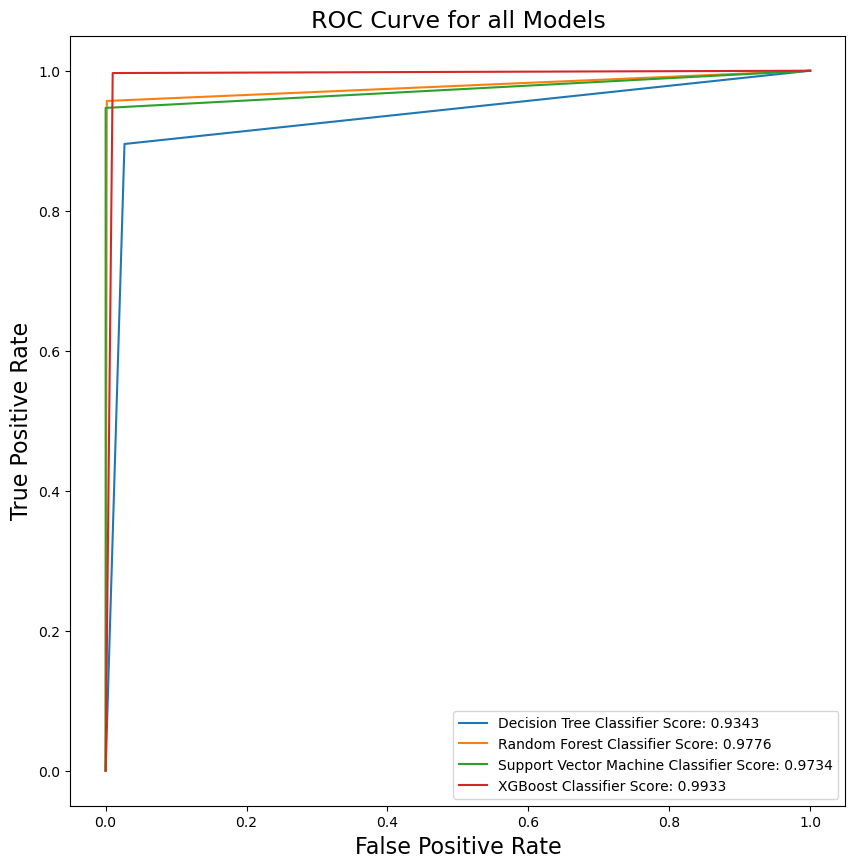

In [113]:
# ROC Curve

plt.figure(figsize=[10,10])
plt.title("ROC Curve for all Models", fontsize=17)
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ypred_dtree)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ypred_rf)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Machine Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ypred_gsvc)))
plt.plot(xg_fpr, xg_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, ypred_xgb)))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

